In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
data=load_iris()

In [4]:
df=pd.DataFrame(columns=data.feature_names,data=data.data)
df['target']=data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df=df[df['target']!=0][['sepal length (cm)','sepal width (cm)','target']]

In [6]:
df

,sepal length (cm),sepal width (cm),target
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

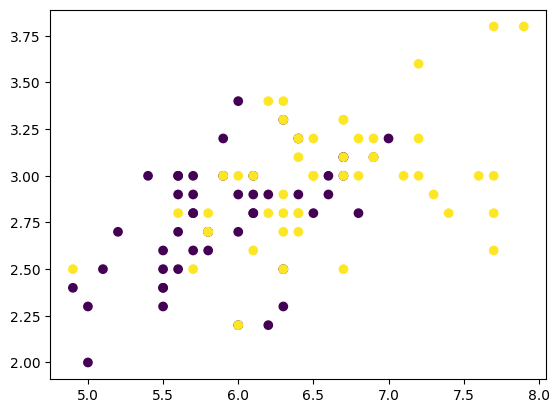

In [9]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['target'])

In [10]:
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [11]:
df_train

,sepal length (cm),sepal width (cm),target
90,5.5,2.6,1
89,5.5,2.5,1
88,5.6,3.0,1
97,6.2,2.9,1
76,6.8,2.8,1
148,6.2,3.4,2
133,6.3,2.8,2
103,6.3,2.9,2
145,6.7,3.0,2
83,6.0,2.7,1


In [15]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [14]:
X_test

array([[5.7, 2.8],
       [5.5, 2.4],
       [6.5, 3. ],
       [6.4, 2.7],
       [7.7, 3.8]])

# case1 bagging

In [16]:
# Data for tree 1
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
df_bag

,sepal length (cm),sepal width (cm),target
133,6.3,2.8,2
97,6.2,2.9,1
148,6.2,3.4,2
89,5.5,2.5,1
90,5.5,2.6,1
88,5.6,3.0,1
90,5.5,2.6,1
90,5.5,2.6,1


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
dt_bag1=DecisionTreeClassifier()

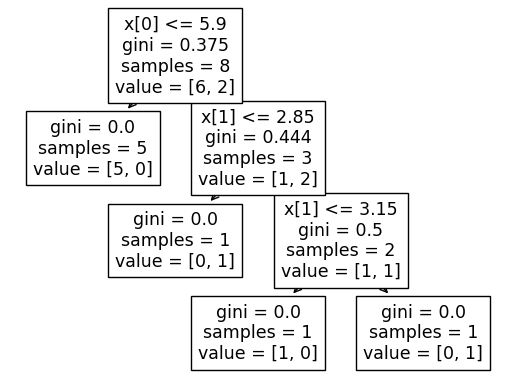

C:\Users\sy669\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sy669\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


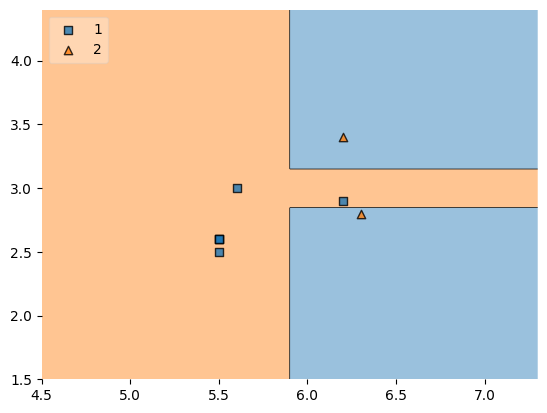

In [26]:
evaluate(dt_bag1,X,y)

In [25]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [27]:
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal length (cm),sepal width (cm),target
133,6.3,2.8,2
103,6.3,2.9,2
133,6.3,2.8,2
133,6.3,2.8,2
76,6.8,2.8,1
90,5.5,2.6,1
90,5.5,2.6,1
148,6.2,3.4,2


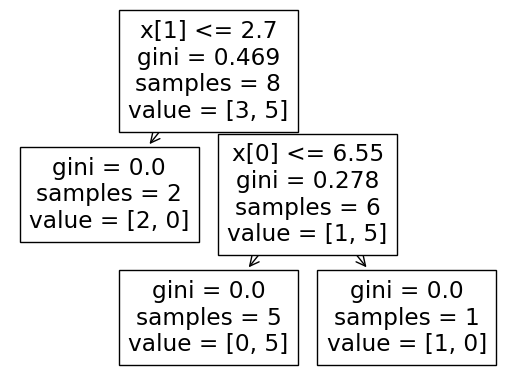

C:\Users\sy669\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sy669\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


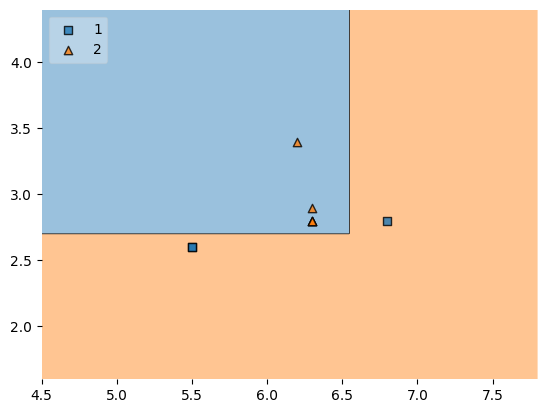

In [28]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)